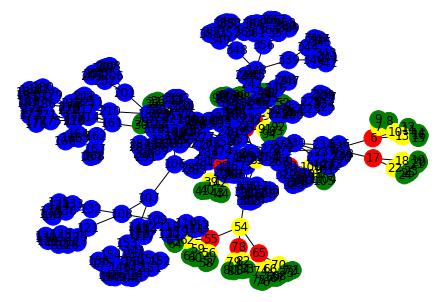

In [14]:
import simpy
import random
import statistics
wait_times = []
simul_scan = {}
import networkx as nx  # importing networkx package
import matplotlib.pyplot as plt # importing matplotlib package and pyplot is for displaying the graph on canvas 


class Mav(nx.Graph):
    def __init__(self):
        #self.env = env
        super().__init__()
        self.node_name = 1
        self.graph_depth = 7
        self.mav_on = False
        self.markers ="blue green yellow red yellow green".split()

    def do_edge(self, node, depth, mav=0):
        self.node_name += 1
        mav_depth = 6
        name = self.node_name
        self.add_edge(node, name, color=mav if depth > 1 else "red")
        self.nodes[name]['color'] = self.markers[mav] # if depth > 1 else "red"
        depth -= 1
        if (not self.mav_on) and (depth < mav_depth):
            self.mav_on = True
            mav = 1
        elif mav and (depth <mav_depth):
            mav += 1
        [self.do_edge(name, depth, mav=mav) for _ in range(0, random.randint(2,3)) if depth]

    def add_edge(self, ori, dest, **kwargs):
        super().add_edge(ori, dest, **kwargs)

    def build(self):
        self.do_edge(self.node_name, 7)
        self.nodes[1]['color'] = "blue"
        values = [self.nodes[node]["color"] for node in self.nodes()]

        #nx.draw(G, cmap=plt.get_cmap('jet'), node_color=values)
        nx.draw(self, with_labels=True, node_color=values)  #draws the networkx graph containing nodes which are declared till before
        plt.show()  # displays the networkx graph on matplotlib canvas


def main():
    mav = Mav()
    mav.build()


main()
#scan()